In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [16]:
video_path = 'predict/Demo F.mp4'
output_folder = 'predict/extracted_faces/'

cap = cv2.VideoCapture(video_path)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=2.9, minNeighbors=5)

    for i, (x, y, w, h) in enumerate(faces):
        face_image = frame[y:y+h, x:x+w]
        save_path = os.path.join(output_folder, f"face_{frame_count}_{i}.jpg")
        cv2.imwrite(save_path, face_image)
        print(f"Face {frame_count}_{i} extracted and saved")

    frame_count += 1
cap.release()

Face 19_0 extracted and saved
Face 21_0 extracted and saved
Face 22_0 extracted and saved
Face 23_0 extracted and saved
Face 24_0 extracted and saved
Face 26_0 extracted and saved
Face 27_0 extracted and saved
Face 28_0 extracted and saved
Face 29_0 extracted and saved
Face 30_0 extracted and saved
Face 31_0 extracted and saved
Face 32_0 extracted and saved
Face 33_0 extracted and saved
Face 34_0 extracted and saved
Face 35_0 extracted and saved
Face 37_0 extracted and saved
Face 38_0 extracted and saved
Face 39_0 extracted and saved
Face 40_0 extracted and saved
Face 41_0 extracted and saved
Face 42_0 extracted and saved
Face 43_0 extracted and saved
Face 44_0 extracted and saved
Face 45_0 extracted and saved
Face 46_0 extracted and saved
Face 47_0 extracted and saved
Face 48_0 extracted and saved
Face 49_0 extracted and saved
Face 51_0 extracted and saved
Face 52_0 extracted and saved
Face 53_0 extracted and saved
Face 54_0 extracted and saved
Face 55_0 extracted and saved
Face 56_0 

KeyboardInterrupt: 

In [2]:
def create_collage(image_folder, output_path, collage_size=(800, 600)):

    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    num_images = len(image_files)
    num_columns = int(num_images**0.5)
    num_rows = (num_images + num_columns - 1) // num_columns

    tile_width = collage_size[0] // num_columns
    tile_height = collage_size[1] // num_rows
    
    collage = Image.new('RGB', collage_size)
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)

        image.thumbnail((tile_width, tile_height))

        x = (i % num_columns) * tile_width
        y = (i // num_columns) * tile_height
        
        collage.paste(image, (x, y))

    collage.save(output_path)


image_folder = 'predict/extracted_faces/'
output_path = 'predict/collage.jpg'
create_collage(image_folder, output_path)

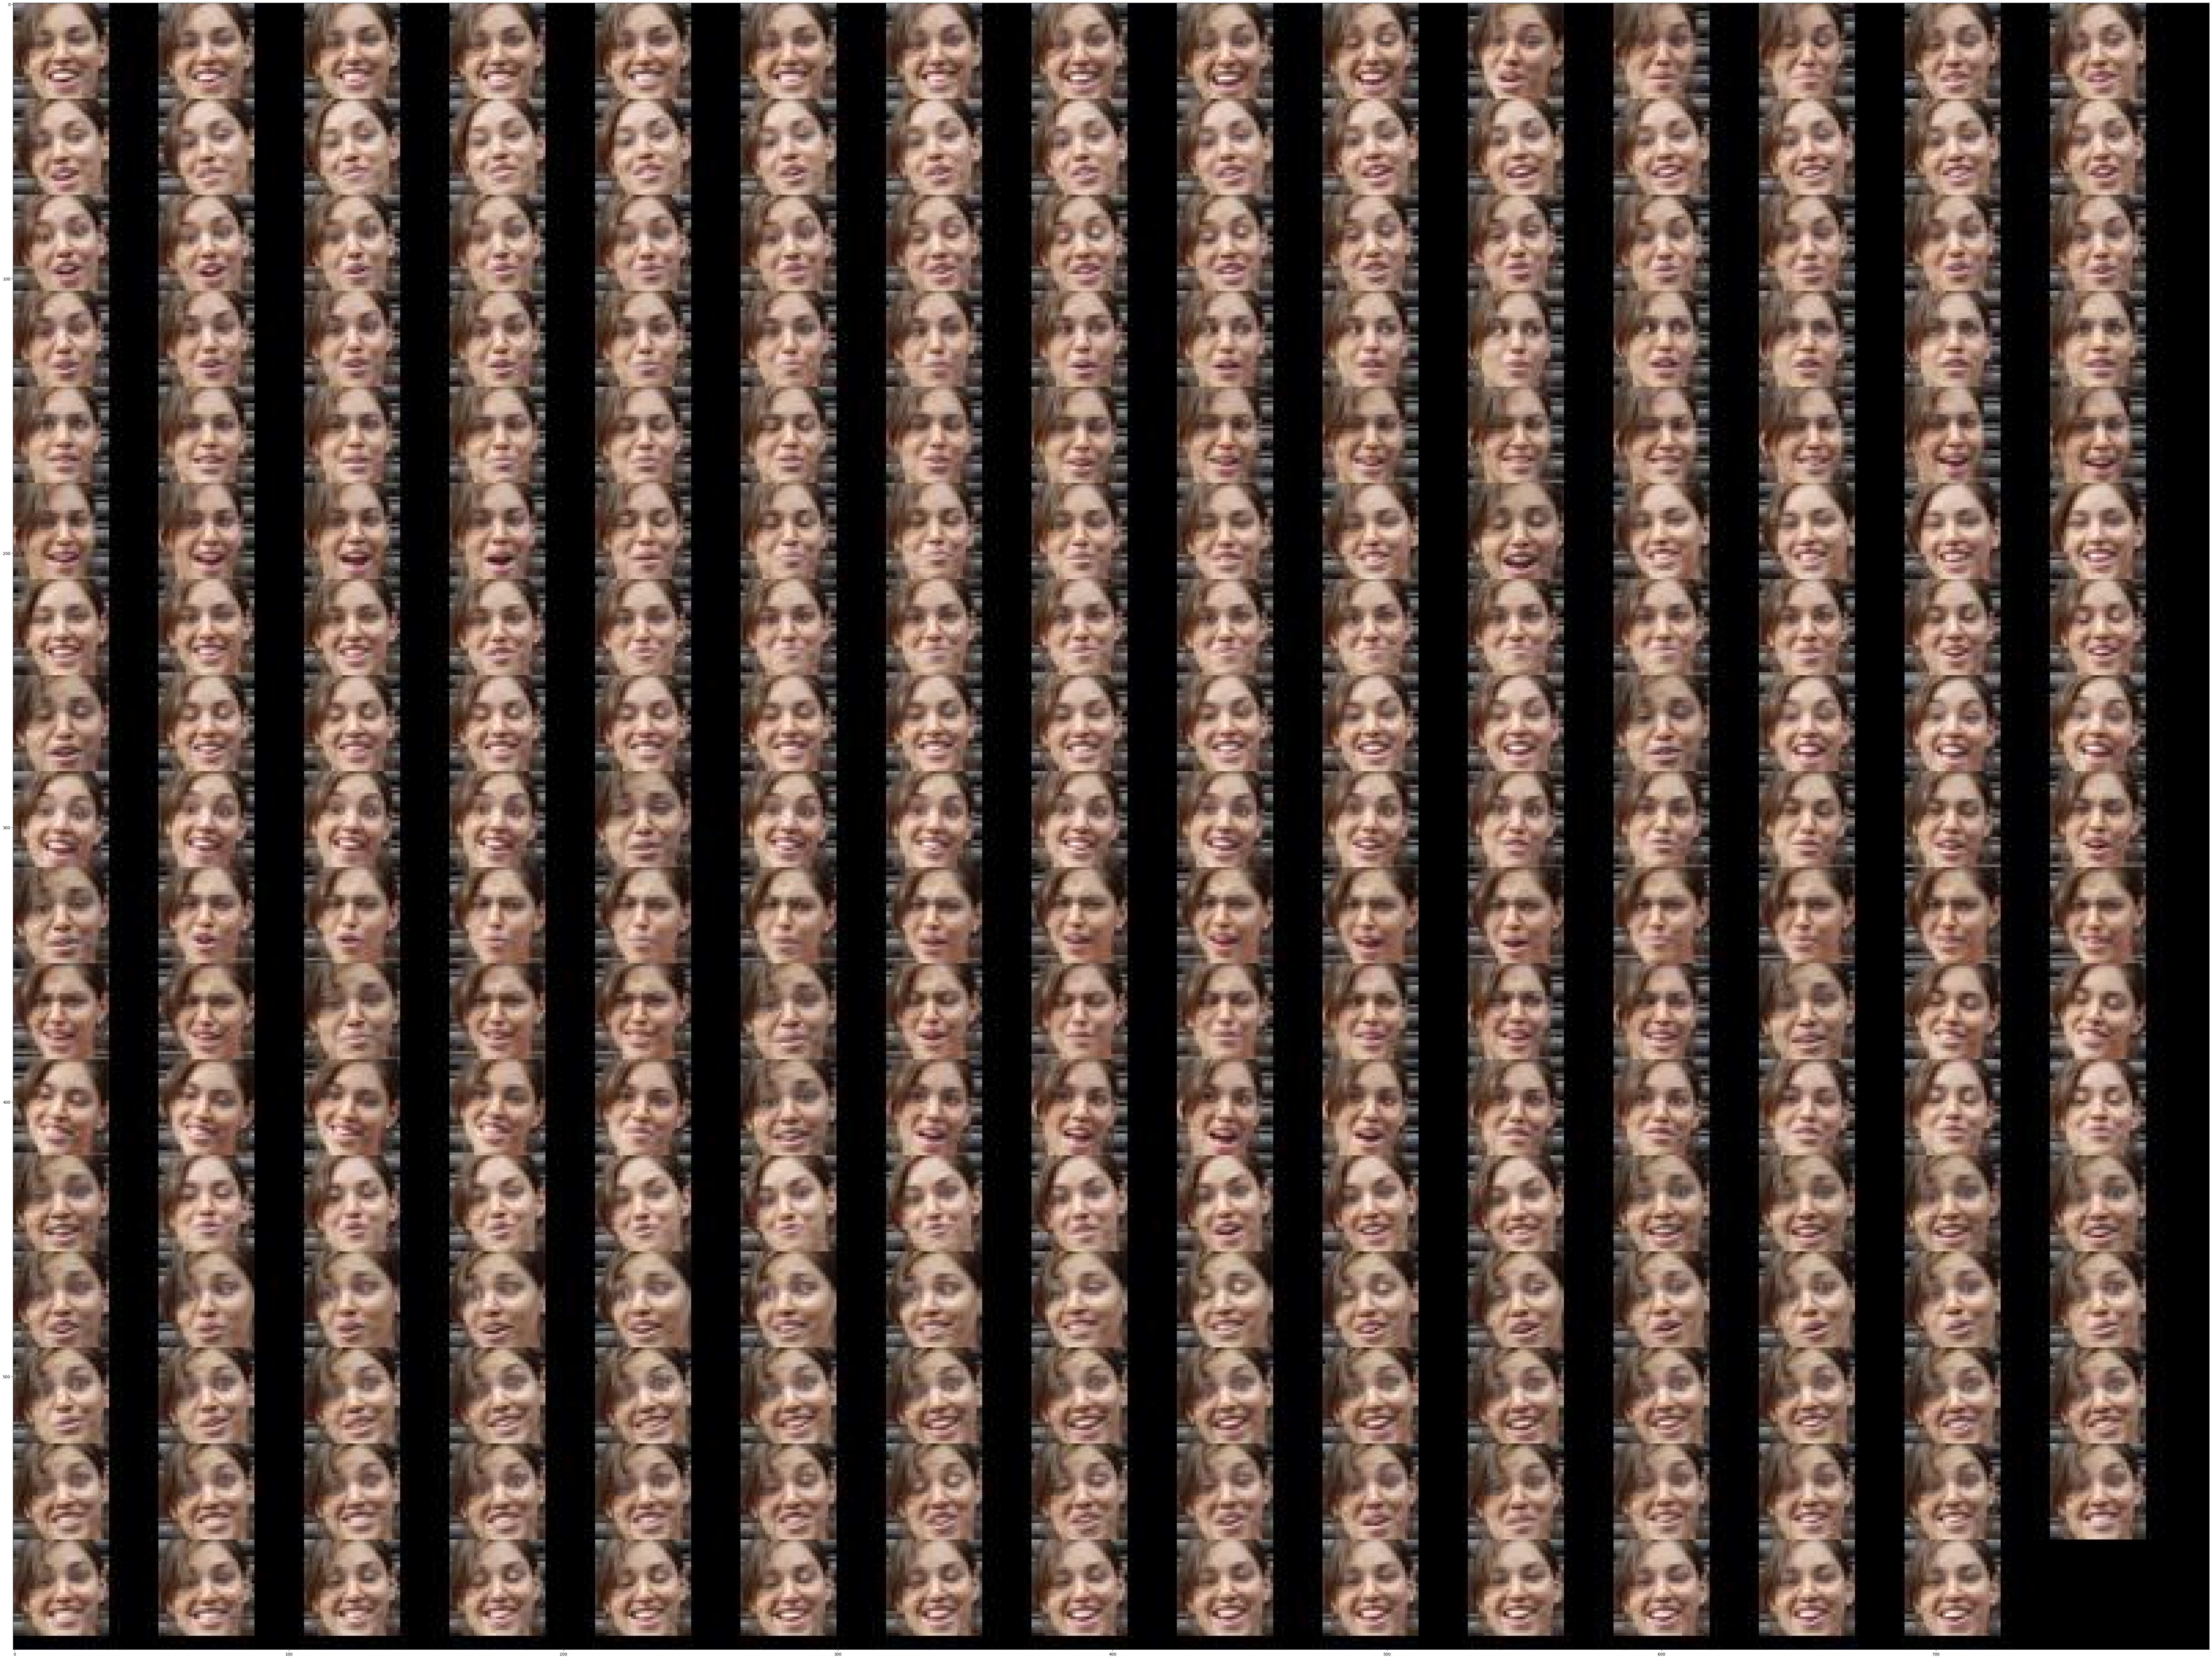

In [3]:
image_path = 'predict/collage.jpg'
image = cv2.imread(image_path)
fig, ax = plt.subplots(figsize=(100,100))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
model = YOLO('predict/best.pt')

In [11]:
folder_path = 'predict/extracted_faces/'

img_results = []
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg')):
        results = model('predict/extracted_faces/' + filename)
        if(results[0].probs.data[0] < results[0].probs.data[1] and results[0].probs.data[1] > 0.70):
            img_results.append('Real')
        elif (results[0].probs.data[0] > results[0].probs.data[1] and results[0].probs.data[0] > 0.70):
            img_results.append('Fake')



image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_100_0.jpg: 192x192 Fake 1.00, Real 0.00, 31.0ms
Speed: 2.0ms preprocess, 31.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_101_0.jpg: 192x192 Fake 1.00, Real 0.00, 24.0ms
Speed: 6.0ms preprocess, 24.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_102_0.jpg: 192x192 Fake 0.87, Real 0.13, 19.0ms
Speed: 4.0ms preprocess, 19.0ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_103_0.jpg: 192x192 Fake 0.86, Real 0.14, 26.0ms
Speed: 4.0ms preprocess, 26.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_104_0.jpg: 192x

Speed: 2.0ms preprocess, 22.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_148_0.jpg: 192x192 Fake 1.00, Real 0.00, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_149_0.jpg: 192x192 Fake 1.00, Real 0.00, 22.0ms
Speed: 4.0ms preprocess, 22.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_150_0.jpg: 192x192 Fake 0.80, Real 0.20, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_151_0.jpg: 192x192 Fake 1.00, Real 0.00, 17.0ms
Speed: 4.0ms preprocess, 17.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)


image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_186_0.jpg: 192x192 Fake 0.95, Real 0.05, 21.0ms
Speed: 4.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_188_0.jpg: 192x192 Fake 0.85, Real 0.15, 20.0ms
Speed: 3.0ms preprocess, 20.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_190_0.jpg: 192x192 Fake 0.99, Real 0.01, 18.0ms
Speed: 3.0ms preprocess, 18.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_191_0.jpg: 192x192 Fake 0.96, Real 0.04, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_192_0.jpg: 192x

Speed: 3.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_224_0.jpg: 192x192 Fake 1.00, Real 0.00, 27.0ms
Speed: 5.0ms preprocess, 27.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_225_0.jpg: 192x192 Fake 1.00, Real 0.00, 18.0ms
Speed: 4.0ms preprocess, 18.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_226_0.jpg: 192x192 Fake 1.00, Real 0.00, 18.0ms
Speed: 3.0ms preprocess, 18.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_227_0.jpg: 192x192 Fake 1.00, Real 0.00, 18.0ms
Speed: 4.0ms preprocess, 18.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)


image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_261_0.jpg: 192x192 Real 0.85, Fake 0.15, 43.0ms
Speed: 3.0ms preprocess, 43.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_262_0.jpg: 192x192 Fake 0.92, Real 0.08, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_263_0.jpg: 192x192 Fake 0.79, Real 0.21, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_264_0.jpg: 192x192 Real 0.62, Fake 0.38, 19.0ms
Speed: 4.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_267_0.jpg: 192x

Speed: 4.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_312_0.jpg: 192x192 Fake 0.70, Real 0.30, 20.0ms
Speed: 4.0ms preprocess, 20.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_313_0.jpg: 192x192 Real 0.72, Fake 0.28, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_314_0.jpg: 192x192 Real 0.79, Fake 0.21, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_315_0.jpg: 192x192 Fake 0.52, Real 0.48, 21.0ms
Speed: 4.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)


image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_61_0.jpg: 192x192 Fake 1.00, Real 0.00, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_62_0.jpg: 192x192 Fake 1.00, Real 0.00, 29.0ms
Speed: 7.0ms preprocess, 29.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_63_0.jpg: 192x192 Fake 1.00, Real 0.00, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_64_0.jpg: 192x192 Fake 1.00, Real 0.00, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\extracted_faces\face_65_0.jpg: 192x192 F

In [12]:
real_count = img_results.count('Real')
fake_count = img_results.count('Fake')

if real_count > fake_count:
    final_result = 'Real'
else:
    final_result = 'Fake'

In [13]:
if final_result == 'Fake':
    print("Prediction: Video is a DeepFake")
else:
    print("Prediction: Video is a Original")

Prediction: Video is a DeepFake
